# Analysis

* The only strong relationship among the data occurs between temperature and latitutde. There is a strong negative correlation between distance from the equator and temperature, i.e., as you get further away from the equator, a city's maximum temperature gets lower.

* These data show no relationship between latitude and humidity.

* These data show no relationship between latitude and cloudiness, though there seems to be a pretty even distribution of cloudiness as measured by percentage across all latitudes.

* These data show no relationship between latitude and wind speed, though most cities tend to have winds less than 20 mph.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from citipy import citipy

# Import API key
from api_keys import api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

## Perform API Call to OpenWeatherMap for each city

In [3]:
# Create empty lists to collect weather data

name = []
cloud = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind = []

# Initialize counters
i = 1
j = 1

# Extract weather data and save to lists for each available city
print("Beginning Data Retrieval")
print("-----------------------------")

#REMEMBER TO CHANGE CITIES_T WHEN WE WANT TO USE WHOLE DATASET
for city in cities:
    if i % 51 == 0:
        time.sleep(50)
        j +=1
        i = 1
    print(f"Processing Record {i} in set {j} | {city}")
    i +=1
    print(query_url + city)
    response = requests.get(query_url + city).json()
    try:
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        name.append(city)
    except:
        print(f"{city} not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 in set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=busselton
Processing Record 2 in set 1 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=klaksvik
Processing Record 3 in set 1 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=vaitupu
vaitupu not found. Skipping...
Processing Record 4 in set 1 | diego de almagro
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=diego de almagro
Processing Record 5 in set 1 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=barentsburg
barentsburg not found. Skipping...
Processing Record 6 in set 1 | carndonagh
http://api.openweathermap.org/data/2.5/weather?appid=22

Processing Record 3 in set 2 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=sao filipe
Processing Record 4 in set 2 | huangmei
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=huangmei
Processing Record 5 in set 2 | ahuimanu
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=ahuimanu
Processing Record 6 in set 2 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=marcona
marcona not found. Skipping...
Processing Record 7 in set 2 | shetpe
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=shetpe
Processing Record 8 in set 2 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=puerto ayora
Processing Record 9 in set 2 | mys shmidta
http://a

Processing Record 5 in set 3 | the valley
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=the valley
Processing Record 6 in set 3 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=longyearbyen
Processing Record 7 in set 3 | airai
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=airai
Processing Record 8 in set 3 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=nikolskoye
Processing Record 9 in set 3 | gananoque
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=gananoque
Processing Record 10 in set 3 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=cherskiy
Processing Record 11 in set 3 | samarai
http://api.openweathermap.org/data/

Processing Record 7 in set 4 | mareeba
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=mareeba
Processing Record 8 in set 4 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=rio gallegos
Processing Record 9 in set 4 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=hithadhoo
Processing Record 10 in set 4 | selikhino
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=selikhino
Processing Record 11 in set 4 | natchez
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=natchez
Processing Record 12 in set 4 | kutum
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=kutum
Processing Record 13 in set 4 | cidreira
http://api.openweathermap.org/data/2.5/wea

Processing Record 10 in set 5 | berlevag
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=berlevag
Processing Record 11 in set 5 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=georgetown
Processing Record 12 in set 5 | puerto rico
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=puerto rico
Processing Record 13 in set 5 | touros
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=touros
Processing Record 14 in set 5 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=tiksi
Processing Record 15 in set 5 | padang
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=padang
Processing Record 16 in set 5 | sitka
http://api.openweathermap.org/data/2.5/weather?a

Processing Record 13 in set 6 | pokrovsk
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=pokrovsk
Processing Record 14 in set 6 | san quintin
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=san quintin
Processing Record 15 in set 6 | grand-santi
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=grand-santi
Processing Record 16 in set 6 | meadow lake
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=meadow lake
Processing Record 17 in set 6 | beian
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=beian
Processing Record 18 in set 6 | tommot
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=tommot
Processing Record 19 in set 6 | denpasar
http://api.openweathermap.org/dat

Processing Record 18 in set 7 | itacare
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=itacare
Processing Record 19 in set 7 | itarema
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=itarema
Processing Record 20 in set 7 | san diego
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=san diego
Processing Record 21 in set 7 | zheshart
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=zheshart
Processing Record 22 in set 7 | coracao de maria
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=coracao de maria
Processing Record 23 in set 7 | barbar
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=barbar
barbar not found. Skipping...
Processing Record 24 in set 7 | upernavik


Processing Record 22 in set 8 | okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=okhotsk
Processing Record 23 in set 8 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=nouadhibou
Processing Record 24 in set 8 | imbituba
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=imbituba
Processing Record 25 in set 8 | yulara
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=yulara
Processing Record 26 in set 8 | toppenish
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=toppenish
Processing Record 27 in set 8 | rudnichnyy
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=rudnichnyy
Processing Record 28 in set 8 | ancud
http://api.openweathermap.org/data/2.5/w

Processing Record 26 in set 9 | frutal
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=frutal
Processing Record 27 in set 9 | zhanaozen
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=zhanaozen
Processing Record 28 in set 9 | half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=half moon bay
Processing Record 29 in set 9 | ahipara
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=ahipara
Processing Record 30 in set 9 | muravlenko
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=muravlenko
Processing Record 31 in set 9 | olinda
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=olinda
Processing Record 32 in set 9 | jiroft
http://api.openweathermap.org/data/2.

Processing Record 31 in set 10 | pontiac
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=pontiac
Processing Record 32 in set 10 | walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=walvis bay
Processing Record 33 in set 10 | ushibuka
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=ushibuka
Processing Record 34 in set 10 | videira
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=videira
Processing Record 35 in set 10 | palafrugell
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=palafrugell
Processing Record 36 in set 10 | koumac
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=koumac
Processing Record 37 in set 10 | san cristobal
http://api.openweathermap.o

shchelyayur not found. Skipping...
Processing Record 34 in set 11 | lubbock
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=lubbock
Processing Record 35 in set 11 | dovers
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=dovers
Processing Record 36 in set 11 | carutapera
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=carutapera
Processing Record 37 in set 11 | cascais
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=cascais
Processing Record 38 in set 11 | pandaria
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=pandaria
Processing Record 39 in set 11 | naryan-mar
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=naryan-mar
Processing Record 40 in set 11 | hendijan

Processing Record 37 in set 12 | pochutla
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=pochutla
Processing Record 38 in set 12 | jequie
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=jequie
jequie not found. Skipping...
Processing Record 39 in set 12 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=namibe
Processing Record 40 in set 12 | bletchley
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=bletchley
Processing Record 41 in set 12 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=isangel
Processing Record 42 in set 12 | nisia floresta
http://api.openweathermap.org/data/2.5/weather?appid=225c18cf38bf325bef3e0918e6e1ec93&units=imperial&q=nisia floresta
Processing Record 43 in set 12 | zhangye
h

In [4]:
# Convert data to dataframe and save as .csv in output
weather_df = pd.DataFrame({"City": name, "Cloudiness": cloud, "Country": country, 
                           "Date": date, "Humidity": humidity, "Lat": lat,
                           "Max Temp": max_temp, "Wind Speed": wind})

weather_df.to_csv(os.path.join("..", "Resources", "assets", "cities.csv"), index=False, header= True)

# Plotting Data

In [5]:
# Set x-axis values to Latitude for all plots
x_axis = weather_df["Lat"]

# Extract date from df and convert to readable format
datestamp = weather_df["Date"].min()
date = time.strftime('%m/%d/%Y', time.localtime(datestamp))

### Latitude vs. Temperature Plot

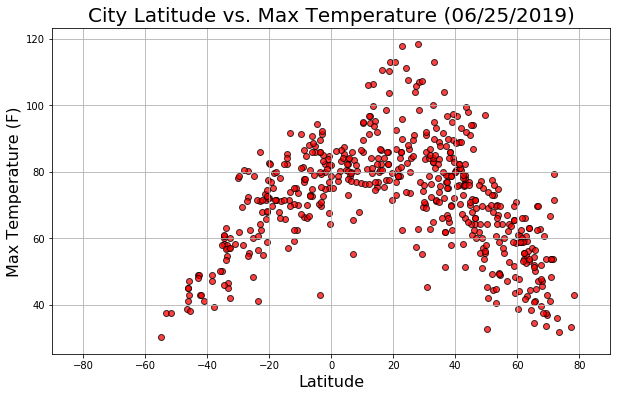

In [6]:
# Set y-axis to temperature
y_axis = weather_df["Max Temp"]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "red", edgecolors = "black", 
            alpha = 0.75)

#Format plot and set parameters
plt.title(f"City Latitude vs. Max Temperature ({date})", fontsize = 20)
plt.xlabel("Latitude", fontsize = 16)
plt.ylabel("Max Temperature (F)", fontsize = 16)
plt.xlim(-90, 90)
plt.ylim(min(y_axis)-5, max(y_axis)+5)
plt.grid()

# Save and display plot
plt.savefig(os.path.join("..", "Resources", "assets", "images", "Lat_v_Temp.png"))
plt.show()

### Latitude vs. Humidity Plot

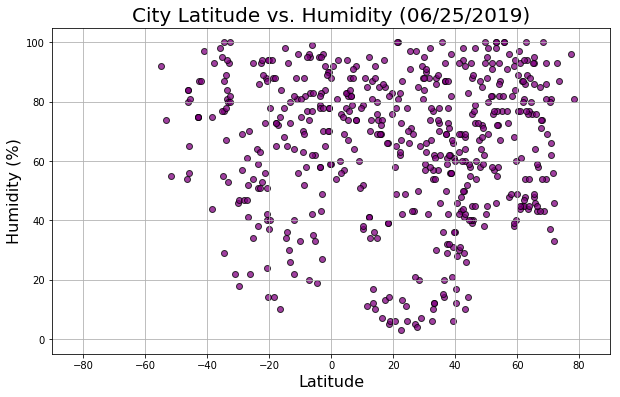

In [7]:
# Set y-axis to humidity
y_axis = weather_df["Humidity"]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "purple", edgecolors = "black", 
            alpha = 0.75)

#Format plot and set parameters
plt.title(f"City Latitude vs. Humidity ({date})", fontsize = 20)
plt.xlabel("Latitude", fontsize = 16)
plt.ylabel("Humidity (%)", fontsize = 16)
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid()

# Save and display plot
plt.savefig(os.path.join("..", "Resources", "assets", "images", "Lat_v_Humid.png"))
plt.show()

### Latitude vs. Cloudiness Plot

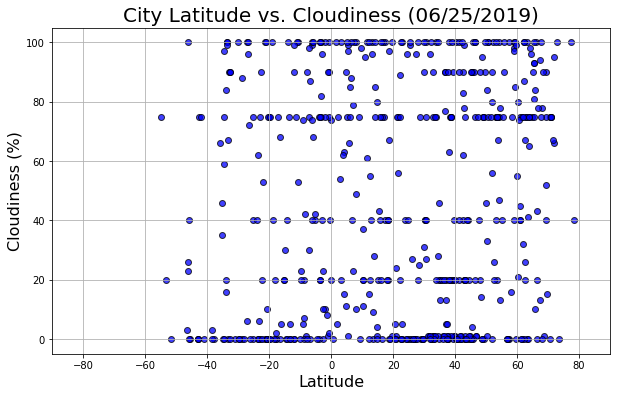

In [8]:
# Set y-axis to cloudiness
y_axis = weather_df["Cloudiness"]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", 
            alpha = 0.75)

#Format plot and set parameters
plt.title(f"City Latitude vs. Cloudiness ({date})", fontsize = 20)
plt.xlabel("Latitude", fontsize = 16)
plt.ylabel("Cloudiness (%)", fontsize = 16)
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid()

# Save and display plot
plt.savefig(os.path.join("..", "Resources", "assets", "images", "Lat_v_Cloudiness.png"))
plt.show()

### Latitude vs. Wind Speed Plot

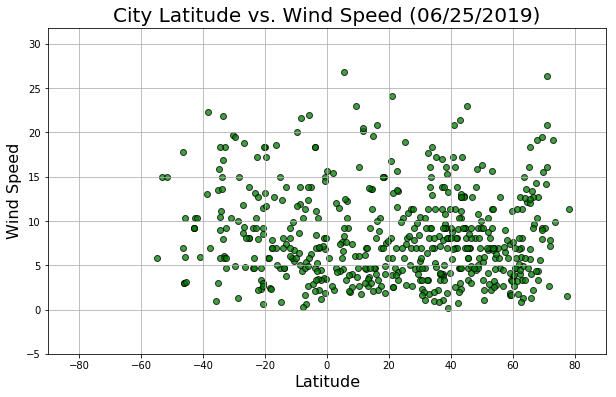

In [9]:
# Set y-axis to Wind Speed
y_axis = weather_df["Wind Speed"]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "green", edgecolors = "black", 
            alpha = 0.75)

#Format plot and set parameters
plt.title(f"City Latitude vs. Wind Speed ({date})", fontsize = 20)
plt.xlabel("Latitude", fontsize = 16)
plt.ylabel("Wind Speed", fontsize = 16)
plt.xlim(-90, 90)
plt.ylim(-5, max(y_axis)+5)
plt.grid()

# Save and display plot
plt.savefig(os.path.join("..", "Resources", "assets", "images", "Lat_v_Speed.png"))
plt.show()